# Data exploration and visualizations.
Based in [kaggle notebook](https://www.kaggle.com/artgor/eda-and-models/data)

In [1]:
! pwd

/home/pablo-ubuntu/Documents/Proyects/aprendizaje-estadistico/ieee-fraud-detection/working


In [2]:
! tree ..

..
├── input
│   ├── sample_submission.csv
│   ├── test_identity.csv
│   ├── test_transaction.csv
│   ├── train_identity.csv
│   └── train_transaction.csv
└── working
    └── data_exploration.ipynb

2 directories, 6 files


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo los datos y mostrando que traen

En este punto decidi no leerlos todos para no agotar la memoria de mi computador, por esto fue que use _n\_rows_

In [4]:
folder_path = '../input/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv', nrows=70000)
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv', nrows=250000)
# test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
# test_transaction = pd.read_csv(f'a{folder_path}test_transaction.csv')
# sub = pd.read_csv(f'{folder_path}sample_submission.csv')
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [5]:
print(f'''
train identity shape:  {train_identity.shape},
train_transaction shape: {train_transaction.shape}
merged tables: {train.shape}''')


train identity shape:  (70000, 41),
train_transaction shape: (250000, 394)
merged tables: (250000, 434)


In [6]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,3236995,0,5955461,9.788,C,2650,142.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,3236996,0,5955465,12.500,W,10112,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,3236997,0,5955482,34.000,W,10075,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249998,3236998,0,5955487,405.000,W,4121,361.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
del train_identity, train_transaction

In [11]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 371 columns in train dataset with missing values.


## Data Exploration
Let's start with identity information. id_01 - id_11 are continuous variables, id_12 - id_38 are categorical and the last two columns are obviously also categorical.  


*id_01* is continuous? I can count the values with this function and it looks discrete despite being float.

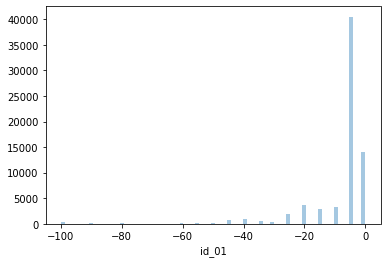

In [30]:
sns.distplot(train['id_01'], bins=77, kde = False ) # Why 77

In [38]:
print( train['id_03'].value_counts(dropna=False, normalize=True).head())
f'id_03 has 88% of missing values and 98% of values are either missing or equal to 0.'

NaN    0.877980
0.0    0.116932
1.0    0.001856
3.0    0.001504
2.0    0.000956
Name: id_03, dtype: float64


'id_03 has 88% of missing values and 98% of values are either missing or equal to 0.'

In [39]:
train['id_11'].value_counts(dropna=False, normalize=True).head()

NaN           0.726372
100.000000    0.256292
95.080002     0.002040
95.160004     0.001324
97.120003     0.001128
Name: id_11, dtype: float64

22% of values in id_11 are equal to 100and 76% are missing. Quite strange.

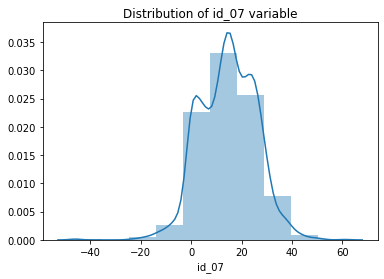

In [44]:
sns.distplot(train['id_07'], bins=10);
plt.title('Distribution of id_07 variable');

In [52]:
feature_count = pd.Series(train['id_31'].value_counts(dropna=False)[:40])

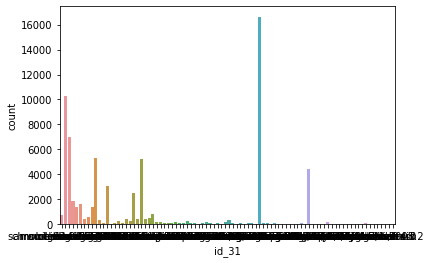

In [55]:
# sns.countplot(x="id_31", data=train)